In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import scikit_posthocs as spp
import statistics as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("waterQuality1.csv")
data = data.drop([7551,7568,7890])
data = data.reset_index()
data = data.drop('index', axis=1)
dataF = data.copy()
print(data.columns)
for i in data.columns:
     for j in range(0,len(data)):
            try:
                dataF.at[j,i] = float(dataF.at[j,i])
                data.at[j,i] = float(data.at[j,i])
                if i != 'is_safe':
                    data.at[j,i] = int(1000 * data.at[j,i])
                else:
                    data.at[j,i]
            except:
                print(data.at[j,i],j,i)
data = data.astype('int64')

dataF

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1.0
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1.0
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1.0
7994,0.01,10.0,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1.0


In [3]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

<Axes: >

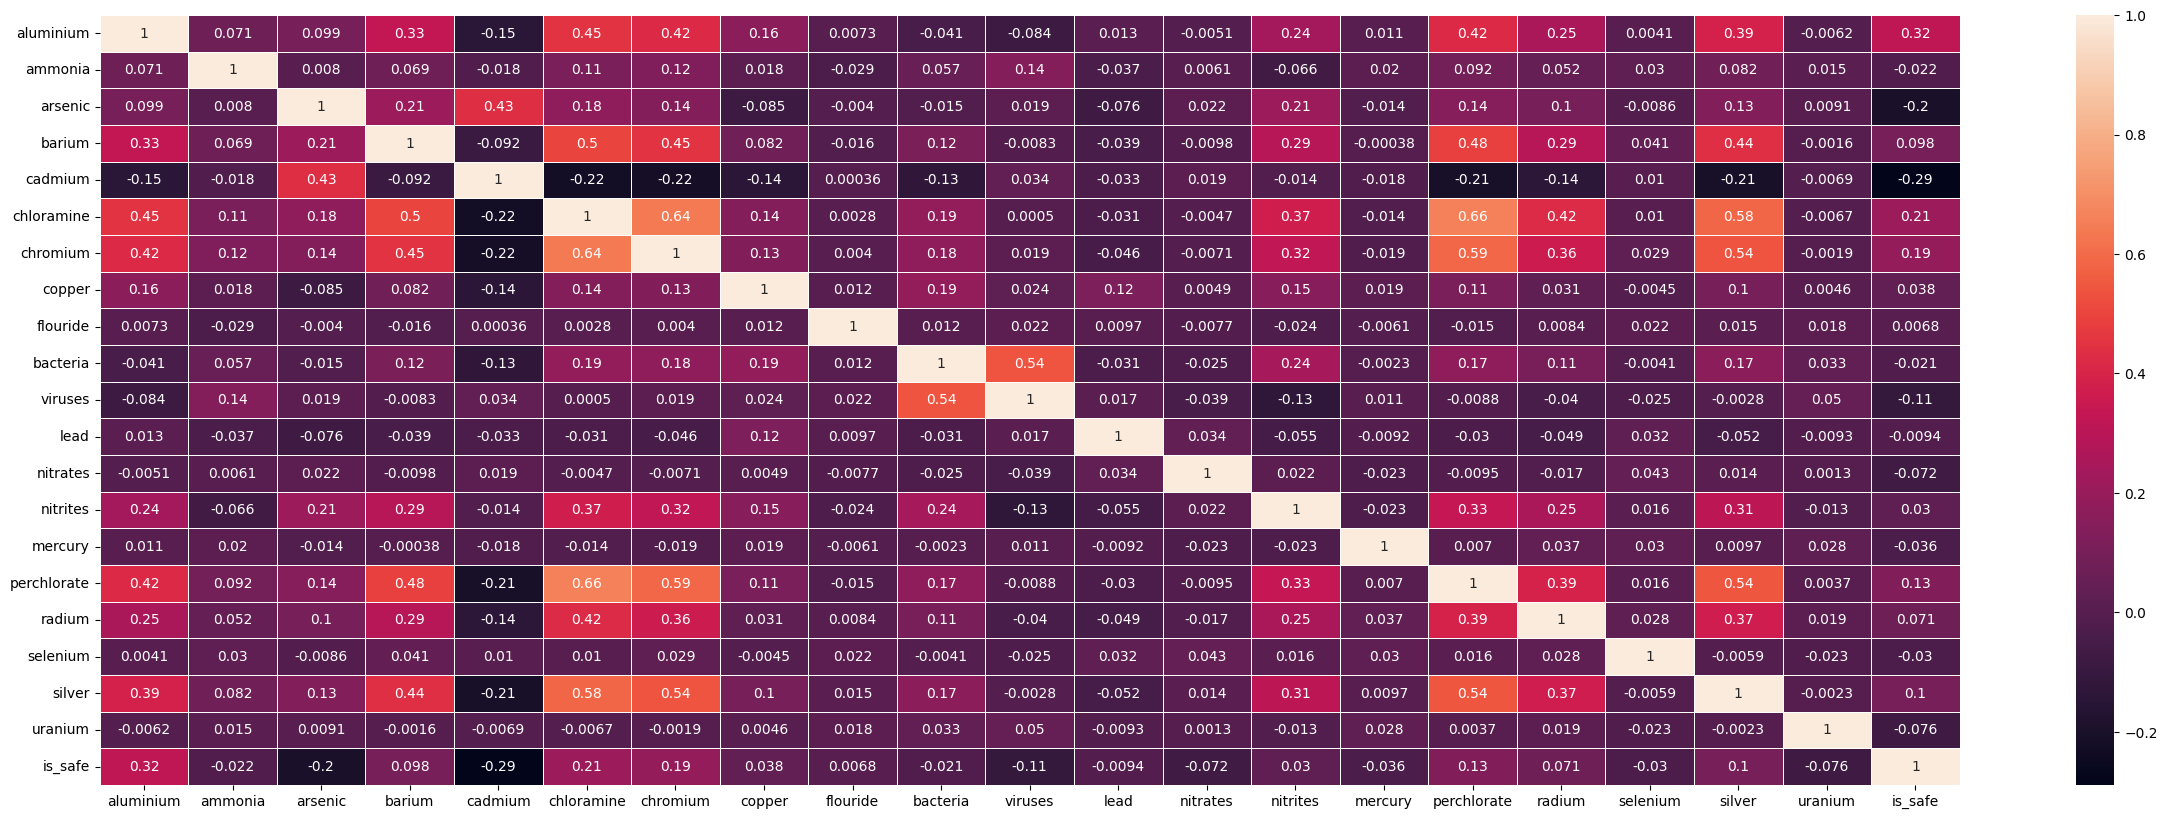

In [4]:
plt.rcParams['figure.figsize'] = [30, 10]
sns.heatmap(data.corr(method='spearman'), linewidths=.5, annot=True) 

In [5]:
rs, pvalues = stats.spearmanr(dataF['viruses'], dataF['bacteria'])
print(rs)
print(pvalues)

0.5385436109450381
0.0


In [6]:
crosstab1 = pd.crosstab(dataF['viruses'],dataF['bacteria'])
crosstab1

bacteria,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.00
viruses,,,,,,,,,,,,,,,,,,,,,
0.000,1042,14,8,0,9,2,0,2,2,6,...,0,2,1,0,2,0,1,1,0,0
0.001,114,7,7,0,6,7,13,12,19,0,...,0,0,0,0,0,0,0,0,0,0
0.002,116,0,7,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.003,95,0,7,7,14,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.004,74,13,6,0,0,13,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.960,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,30,0,0,0,0
0.970,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,51,0,0,0
0.980,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,40,0,0


In [7]:
stats.chi2_contingency(crosstab1)

Chi2ContingencyResult(statistic=296392.5824613711, pvalue=0.0, dof=6000, expected_freq=array([[4.55137444e+02, 8.63669335e+00, 1.09180840e+01, ...,
        6.68121561e+00, 8.63669335e+00, 7.33304152e+00],
       [1.58232741e+02, 3.00262631e+00, 3.79577289e+00, ...,
        2.32278639e+00, 3.00262631e+00, 2.54939970e+00],
       [1.42514257e+02, 2.70435218e+00, 3.41870935e+00, ...,
        2.09204602e+00, 2.70435218e+00, 2.29614807e+00],
       ...,
       [1.85128814e+01, 3.51300650e-01, 4.44097049e-01, ...,
        2.71760880e-01, 3.51300650e-01, 2.98274137e-01],
       [2.58481741e+01, 4.90495248e-01, 6.20060030e-01, ...,
        3.79439720e-01, 4.90495248e-01, 4.16458229e-01],
       [2.16565783e+01, 4.10955478e-01, 5.19509755e-01, ...,
        3.17908954e-01, 4.10955478e-01, 3.48924462e-01]]))

# Логистическая регрессия

In [8]:
from sklearn.linear_model import LogisticRegression
X_RL = data[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium']]
y_RL = data['is_safe']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_RL, y_RL, random_state = 0)


In [10]:
clf = LogisticRegression(max_iter=8000).fit(X_train, y_train)

In [11]:
clf

LogisticRegression(max_iter=8000)

In [12]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.91
Accuracy of Logistic regression classifier on test set: 0.91


не УСЁ

In [77]:
X_RL2 = data[['aluminium','ammonia', 'arsenic', 'cadmium',
              'viruses','mercury']]
y_RL2 = data['is_safe']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_RL2, y_RL2, random_state = 0)
clf2 = LogisticRegression(max_iter=8000).fit(X_train2, y_train2)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf2.score(X_train2, y_train2)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf2.score(X_test2, y_test2)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.90


In [78]:
y_pred2 = clf2.predict(X_test2)
y_pred2_proba = clf2.predict_proba(X_test2)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1773
           1       0.65      0.33      0.44       226

    accuracy                           0.90      1999
   macro avg       0.78      0.65      0.69      1999
weighted avg       0.89      0.90      0.89      1999



In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test2, clf2.predict_proba(X_test2)[:,1])

In [81]:
y_test22 = y_test2.replace({'No': 0, 'Yes': 1})  

In [82]:
y_pred2 = pd.DataFrame(y_pred2).replace({'No': 0, 'Yes': 1})

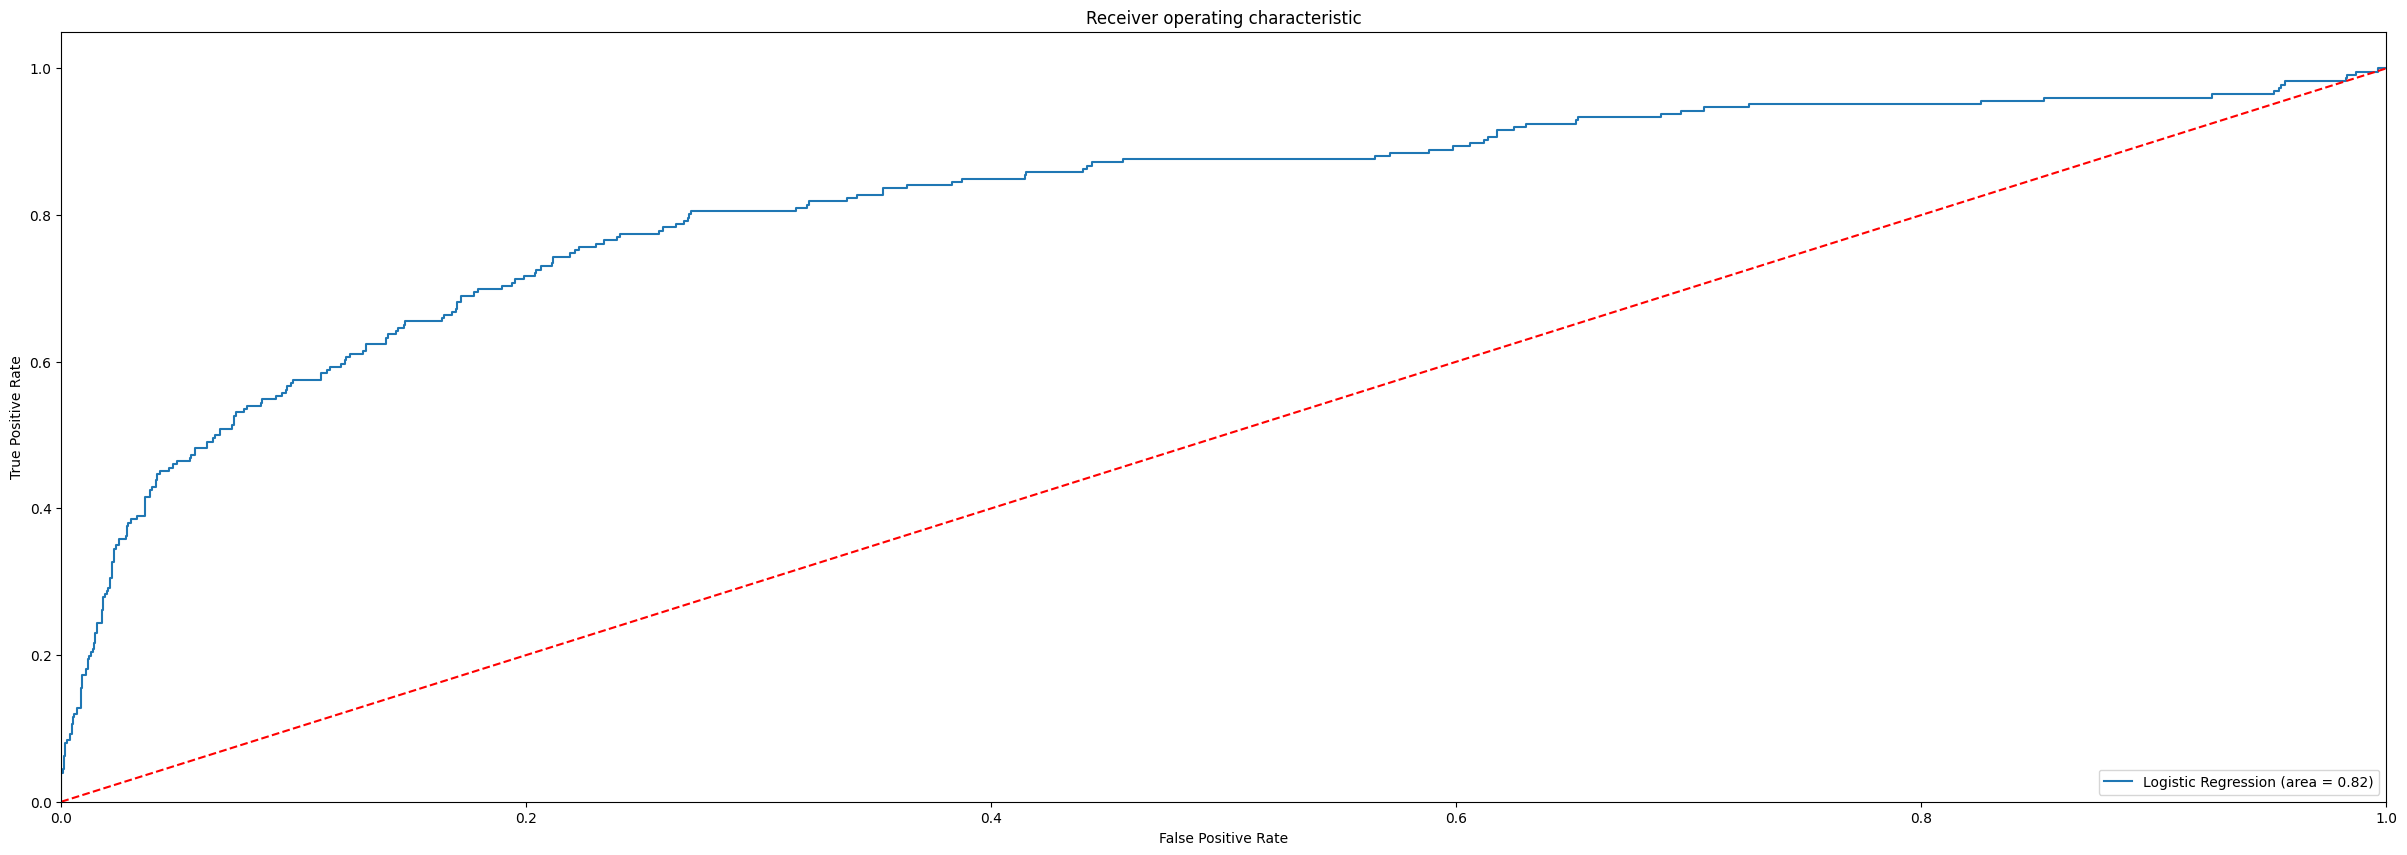

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test22, clf2.predict_proba(X_test2)[:,1])
fpr, tpr, thresholds = roc_curve(y_test22, clf2.predict_proba(X_test2)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

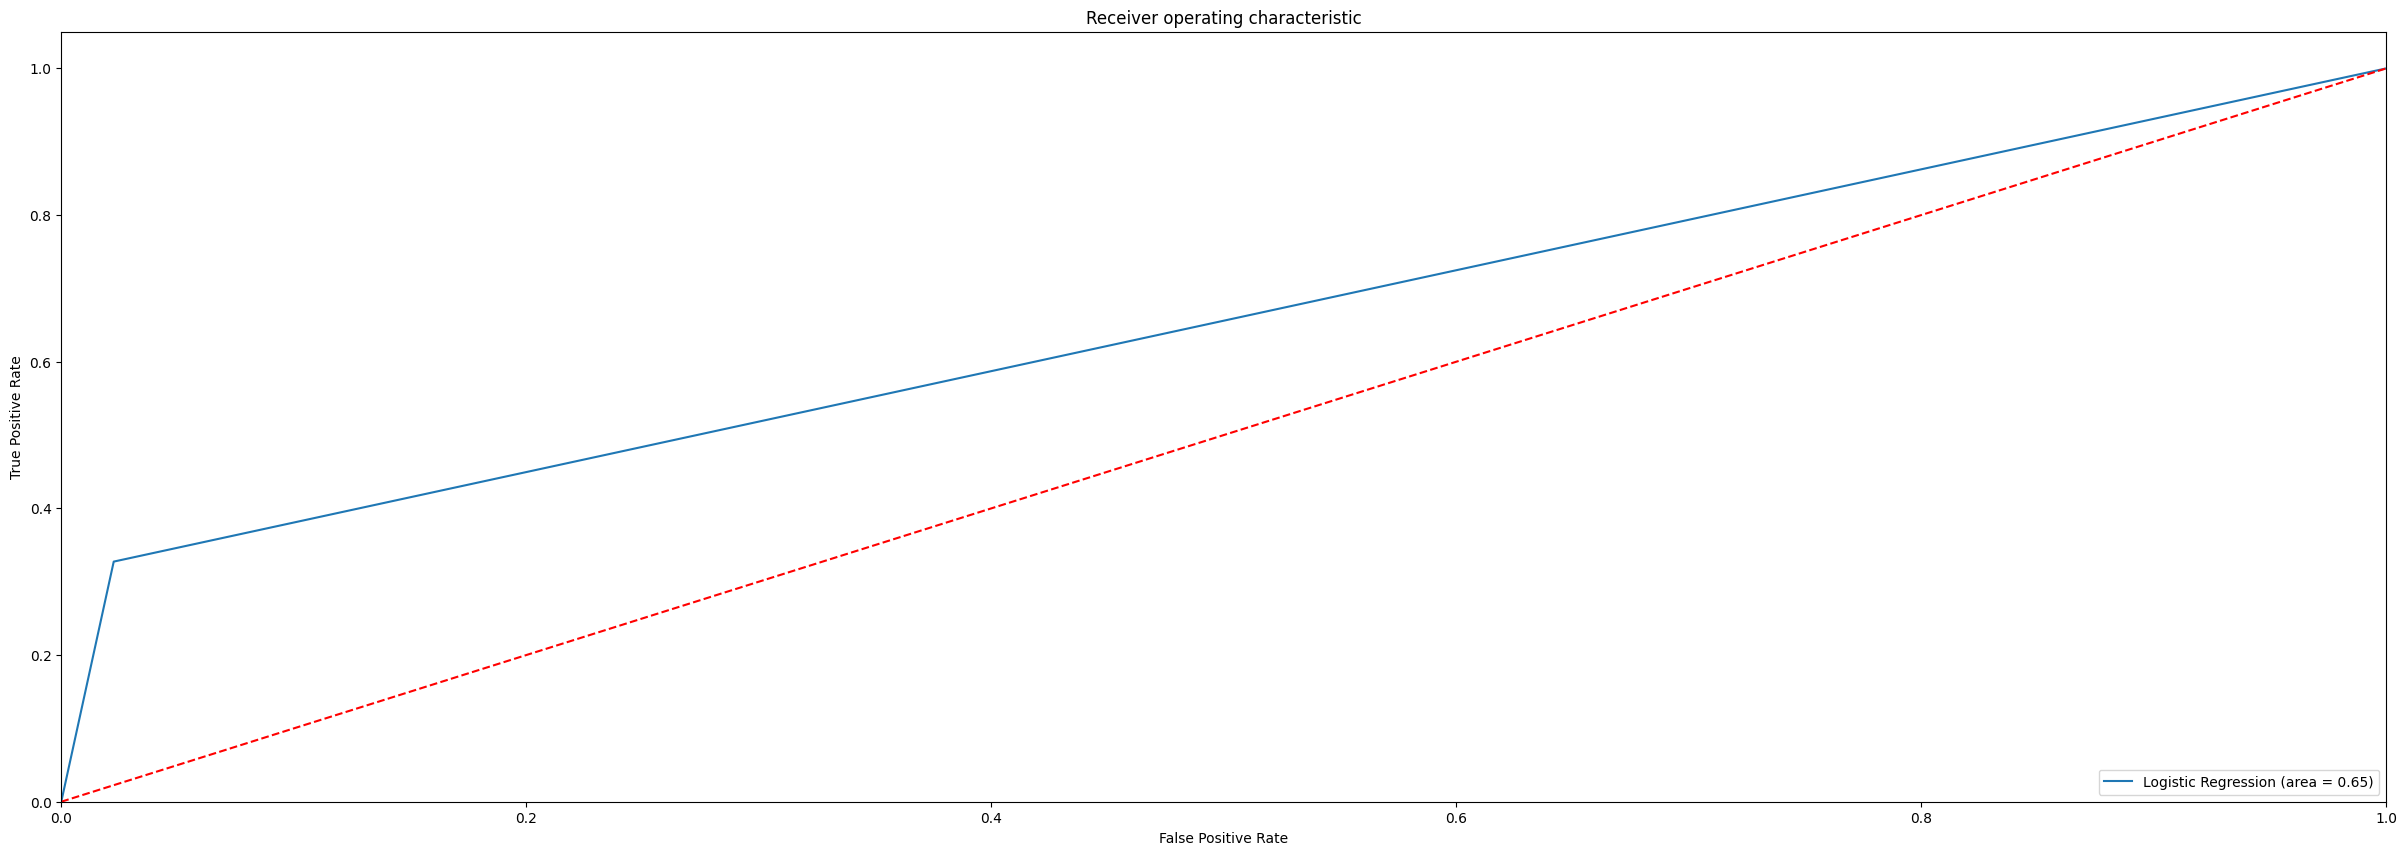

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test22, y_pred2)
fpr, tpr, thresholds = roc_curve(y_test22, y_pred2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# К ближайших соседей

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train2,y_train2)

KNeighborsClassifier(n_neighbors=3)

In [86]:
print('Accuracy of K classifier on training set: {:.2f}'
     .format(model.score(X_train2, y_train2)))
print('Accuracy of K regression classifier on test set: {:.2f}'
     .format(model.score(X_test2, y_test2)))

Accuracy of K classifier on training set: 0.92
Accuracy of K regression classifier on test set: 0.88


In [87]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1773
           1       0.65      0.33      0.44       226

    accuracy                           0.90      1999
   macro avg       0.78      0.65      0.69      1999
weighted avg       0.89      0.90      0.89      1999



In [88]:
y_pred2 = pd.DataFrame(y_pred2).replace({'No': 0, 'Yes': 1})

In [89]:
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train2,y_train2)

KNeighborsClassifier()

In [90]:
print('Accuracy of K classifier on training set: {:.2f}'
     .format(model5.score(X_train2, y_train2)))
print('Accuracy of K regression classifier on test set: {:.2f}'
     .format(model5.score(X_test2, y_test2)))

Accuracy of K classifier on training set: 0.91
Accuracy of K regression classifier on test set: 0.89


In [91]:
y_pred25 = model5.predict(X_test2)

In [92]:
print(classification_report(y_test2, y_pred25))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1773
           1       0.53      0.26      0.35       226

    accuracy                           0.89      1999
   macro avg       0.72      0.61      0.64      1999
weighted avg       0.87      0.89      0.87      1999

